##**Part 1: Data Understanding and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Car.csv')
print(df.head())

     model  year transmission  mileage fuelType  tax   mpg  engineSize  price
0   Fiesta  2017    Automatic    15944   Petrol  150  57.7         1.0  12000
1    Focus  2018       Manual     9083   Petrol  150  57.7         1.0  14000
2    Focus  2017       Manual    12456   Petrol  150  57.7         1.0  13000
3   Fiesta  2019       Manual    10460   Petrol  145  40.3         1.5  17500
4   Fiesta  2019    Automatic     1482   Petrol  145  48.7         1.0  16500


In [ ]:
print(df.isnull().sum())

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


In [ ]:
print(df.describe())

               year        mileage           tax           mpg    engineSize  \
count  17966.000000   17966.000000  17966.000000  17966.000000  17966.000000   
mean    2016.866470   23362.608761    113.329456     57.906980      1.350807   
std        2.050336   19472.054349     62.012456     10.125696      0.432367   
min     1996.000000       1.000000      0.000000     20.800000      0.000000   
25%     2016.000000    9987.000000     30.000000     52.300000      1.000000   
50%     2017.000000   18242.500000    145.000000     58.900000      1.200000   
75%     2018.000000   31060.000000    145.000000     65.700000      1.500000   
max     2060.000000  177644.000000    580.000000    201.800000      5.000000   

              price  
count  17966.000000  
mean   12279.534844  
std     4741.343657  
min      495.000000  
25%     8999.000000  
50%    11291.000000  
75%    15299.000000  
max    54995.000000  


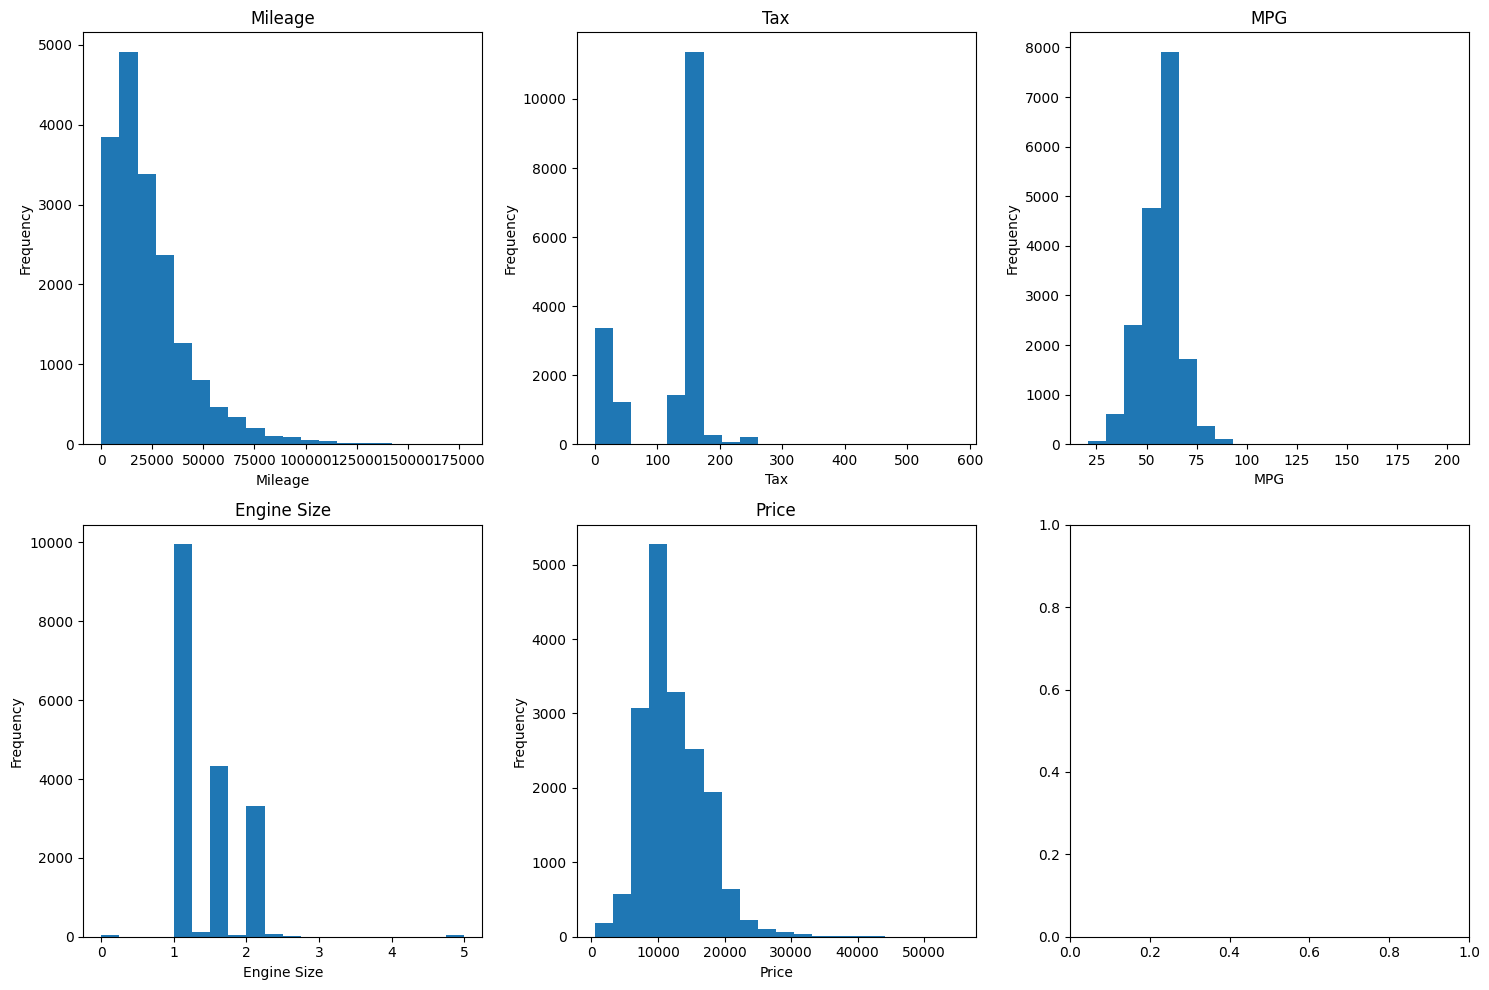

In [ ]:
### histograms for each column
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].hist(df['mileage'], bins=20)
axs[0, 0].set_title('Mileage')
axs[0, 0].set_xlabel('Mileage')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['tax'], bins=20)
axs[0, 1].set_title('Tax')
axs[0, 1].set_xlabel('Tax')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(df['mpg'], bins=20)
axs[0, 2].set_title('MPG')
axs[0, 2].set_xlabel('MPG')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(df['engineSize'], bins=20)
axs[1, 0].set_title('Engine Size')
axs[1, 0].set_xlabel('Engine Size')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['price'], bins=20)
axs[1, 1].set_title('Price')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

the data distributions for each column tell us alot about the data.
**mileage:** The distribution is right-skewed (positively skewed), with the majority of values concentrated at lower mileages (0–50,000). There is a long tail extending to higher mileages.
**tax:** This is also right-skewed. The majority of data points fall within a narrow range (around 100–200), with very few higher values.
**mpg:** the MPG distribution is slightly right-skewed but mostly normal in shape, centered around 50-75 MPG. There is a small tail to the right but no significant outliers.
**engine size:** The distribution is heavily right-skewed. A large number of vehicles have a small engine size (around 1–2 liters), with very few having larger engines.
**price: **The distribution is right-skewed, with most prices clustered between 0 and 20,000, and a small number of vehicles priced significantly higher.

In [ ]:
### label encoding

from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'], drop_first=True)
numeric_columns = ['mileage', 'tax', 'mpg', 'engineSize', 'price']

scaler = StandardScaler()

df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Now df_encoded contains both the one-hot encoded categorical columns and standardized numeric columns
display(df_encoded.head())


,year,mileage,tax,mpg,engineSize,price,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,-0.380998,0.591358,-0.020442,-0.811386,-0.058959,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,-0.733359,0.591358,-0.020442,-0.811386,0.362875,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,-0.560132,0.591358,-0.020442,-0.811386,0.151958,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,-0.662640,0.510727,-1.738890,0.345070,1.101082,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,-1.123724,0.510727,-0.909294,-0.811386,0.890166,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
## standardizing the numeric columns

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
display(df)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,-0.380998,Petrol,0.591358,-0.020442,-0.811386,-0.058959
1,Focus,2018,Manual,-0.733359,Petrol,0.591358,-0.020442,-0.811386,0.362875
2,Focus,2017,Manual,-0.560132,Petrol,0.591358,-0.020442,-0.811386,0.151958
3,Fiesta,2019,Manual,-0.662640,Petrol,0.510727,-1.738890,0.345070,1.101082
4,Fiesta,2019,Automatic,-1.123724,Petrol,0.510727,-0.909294,-0.811386,0.890166
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,-0.342172,Petrol,0.591358,-1.067312,0.113779,-0.691919
17962,B-MAX,2014,Manual,0.890398,Petrol,-1.343791,-0.020442,-0.811386,-1.008294
17963,Focus,2015,Manual,-0.839822,Diesel,-1.505053,0.927668,0.576362,-0.481003
17964,KA,2018,Manual,-0.942690,Petrol,0.510727,-0.020442,-0.348804,-0.839561


##**Part 2: Regression Models**

In [ ]:
### multiple linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the prices for the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate Adjusted R-squared
n = len(y_test)  # number of data points
p = X_train.shape[1]  # number of features
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

# Print the evaluation metrics
print(f'R-squared: {r_squared:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'Adjusted R-squared: {adjusted_r_squared:.4f}')


R-squared: 0.7255
RMSE: 2480.2652
Adjusted R-squared: 0.7251


In [ ]:
## multiple linear regression

import statsmodels.api as sm

X = df[['mileage', 'mpg', 'engineSize', 'year']]
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.194e+04
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        03:14:44   Log-Likelihood:                -13841.
No. Observations:               17966   AIC:                         2.769e+04
Df Residuals:                   17961   BIC:                         2.773e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -520.7594      5.461    -95.366      0.000    -531.463    -510.056
mileage       -0.2397      0.006    -41.908      0.000      -0.251      -0.229
mpg           -0.1781      0.004    -43.083      0.000      -0.186      -0.170
engineSize     0.4890      0.004    116.818      0.000       0.481       0.497
year           0.2582      0.003     95.366      0.000       0.253       0.264
==============================================================================
Omnibus:                     4661.540   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399929.956
Skew:                           0.094   Prob(JB):                         0.00
Kurtosis:                      26.113   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

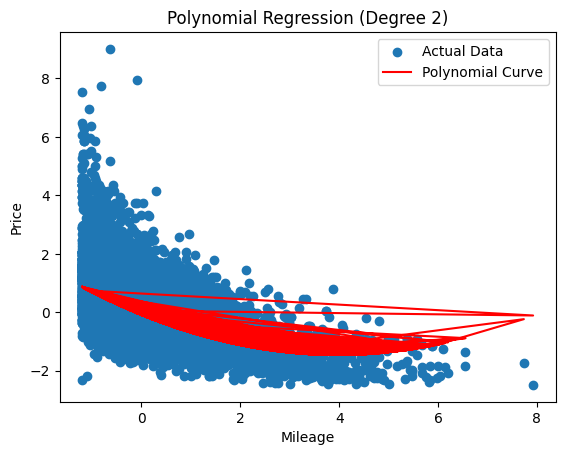

In [ ]:

X = df['mileage']
y = df['price']

X_poly = np.polyfit(X, y, 2)

plt.scatter(X, y, label='Actual Data')
plt.plot(X, np.polyval(X_poly, X), label='Polynomial Curve', color='red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

In [ ]:
degrees = [2, 3, 4]
results = []

for degree in degrees:
    X_poly = np.polyfit(X, y, degree)
    y_pred = np.polyval(X_poly, X)
    r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    adj_r2 = 1 - ((1 - r2) * (len(y) - 1) / (len(y) - degree - 1))
    results.append((degree, r2, rmse, adj_r2))

print('Degree\tR-squared\tRMSE\tAdjusted R-squared')
for result in results:
    print(f'{result[0]}\t{result[1]:.3f}\t{result[2]:.3f}\t{result[3]:.3f}')

Degree	R-squared	RMSE	Adjusted R-squared
2	0.309	3942.027	0.309
3	0.316	3922.464	0.315
4	0.321	3907.126	0.321


As the degree increases, the R-squared and Adjusted R-squared values typically improve, indicating a better fit. However, a higher degree might overfit the data, so Adjusted R-squared is crucial for balancing model complexity and performance.
In this example, the degree 4 model might yield the best performance based on the R-squared, RMSE, and Adjusted R-squared values. However, higher degrees might not always generalize well to unseen data, so degree 3 or 4 could be a better balance between complexity and fit.

##**Part 3: Decision Tree Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
df = pd.read_csv('Car.csv')

df = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'], drop_first=True)

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

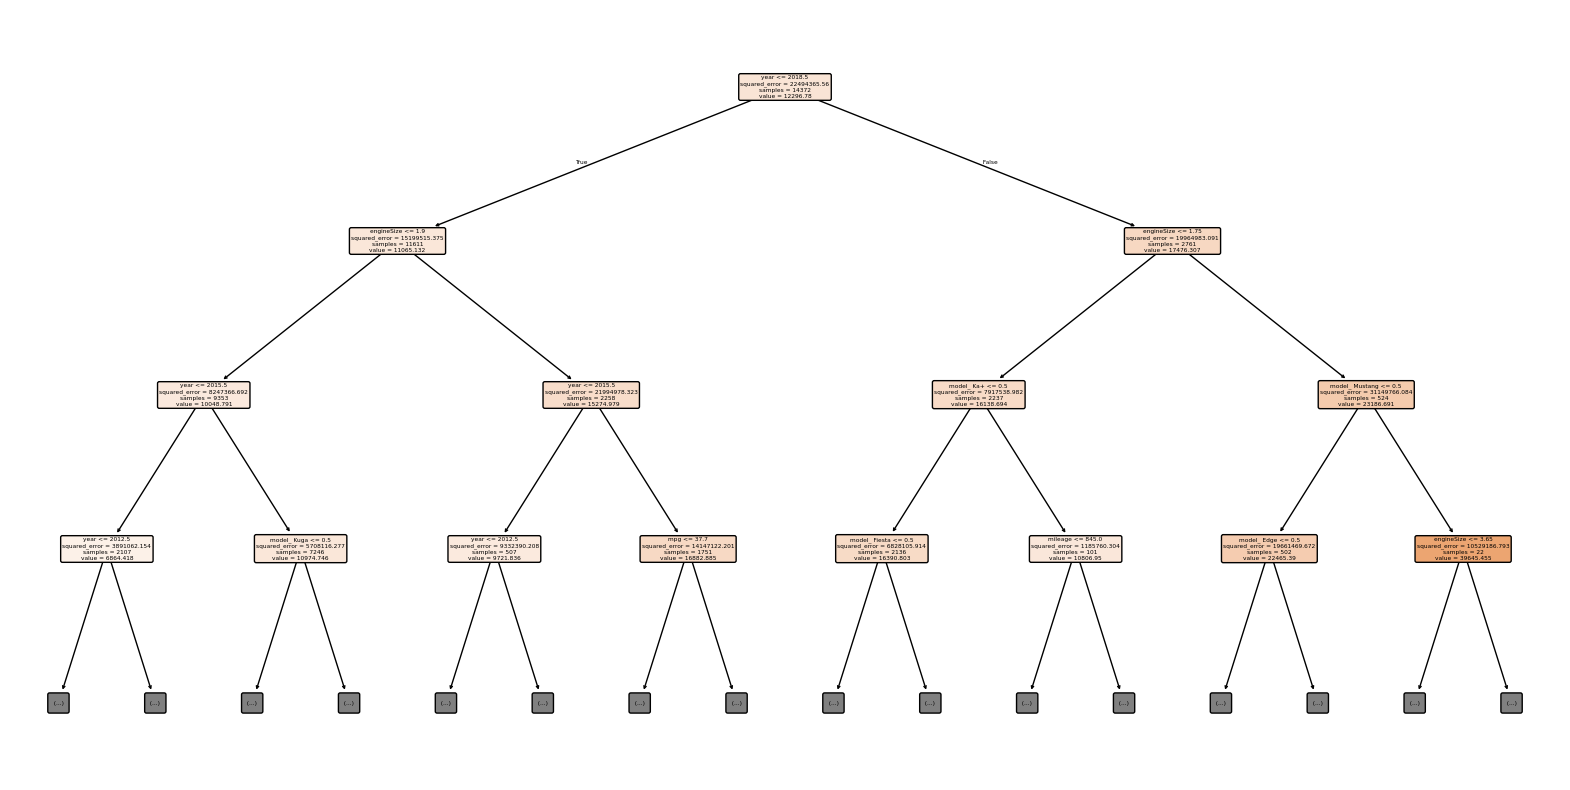

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, max_depth=3)
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R^2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R^2 score: 0.8897923469056106
Mean Squared Error: 2469979.6166759417


##**Part 4: Conclusion and Model Evaluation**

To evaluate and compare different models (such as multiple linear regression, polynomial regression, and decision tree regression), you can use metrics like R-squared, Root Mean Squared Error (RMSE), and Adjusted R-squared.

R-squared (R²): Indicates how well the model accounts for the variance in the target variable. A higher value suggests a better model fit.
RMSE: Represents the square root of the mean squared error, providing insight into the average magnitude of prediction errors.
Adjusted R-squared: A modification of R-squared that accounts for the number of predictors, helping to prevent overfitting by penalizing overly complex models.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred_mlr = mlr.predict(X_test)
r2_mlr = r2_score(y_test, y_pred_mlr)
rmse_mlr = mean_squared_error(y_test, y_pred_mlr, squared=False)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_mlr = 1 - (1 - r2_mlr) * ((n - 1) / (n - p - 1))

print("Multiple Linear Regression:")
print(f"R²: {r2_mlr}")
print(f"RMSE: {rmse_mlr}")
print(f"Adjusted R²: {adj_r2_mlr}")

Multiple Linear Regression:
R²: 0.8458422267142642
RMSE: 1858.7608726632388
Adjusted R²: 0.844369519692147


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)

adj_r2_poly = 1 - (1 - r2_poly) * ((n - 1) / (n - p - 1))

print("Polynomial Regression:")
print(f"R²: {r2_poly}")
print(f"RMSE: {rmse_poly}")
print(f"Adjusted R²: {adj_r2_poly}")

Polynomial Regression:
R²: 0.9107862012375066
RMSE: 1414.0241399737254
Adjusted R²: 0.9099339199343527


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
r2_tree = r2_score(y_test, y_pred)
rmse_tree = mean_squared_error(y_test, y_pred, squared=False)

adj_r2_tree = 1 - (1 - r2_tree) * ((n - 1) / (n - p - 1))

print("Decision Tree Regression:")
print(f"R²: {r2_tree}")
print(f"RMSE: {rmse_tree}")
print(f"Adjusted R²: {adj_r2_tree}")

Decision Tree Regression:
R²: 0.8897923469056106
RMSE: 1571.6168797375337
Adjusted R²: 0.8887395061623655


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Each model has its own limitations, which should be addressed alongside potential improvements. The model you end up choosing depends on what you want to do with data and the limitations you're willing to accept.

Multiple Linear Regression:
Limitations: Assumes a linear relationship between features and the target, which may not hold in real-world scenarios where the relationships are more complex.
Improvements: Introduce interaction terms, polynomial features, or apply regularization methods like Ridge or Lasso to enhance model performance and prevent overfitting.

Polynomial Regression:
Limitations: Although it can model complex relationships, polynomial regression is prone to overfitting, particularly with higher-degree polynomials.
Improvements: Use cross-validation to mitigate overfitting. Opt for lower-degree polynomials or apply regularization techniques to manage complexity.

Decision Tree Regression:
Limitations: Decision trees can overfit the data if they grow too deep and may be sensitive to slight variations in the data.
Improvements: Implement pruning to limit tree depth or explore ensemble methods like Random Forest or Gradient Boosting to improve accuracy and reduce overfitting.





